In [1]:
import numpy as np

In [2]:
import tensorflow as tf
print("Tensorflow version", tf.__version__)

Tensorflow version 2.1.0


In [3]:
from tensorflow import keras
print("Keras version", tf.__version__)

Keras version 2.1.0


In [4]:
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_valid = X_train_full[:5000] / 255
# to scale the image pixel values in the range 0-1
y_valid = y_train_full[:5000]
X_train = X_train_full[5000:] / 255
y_train = y_train_full[5000:]

In [10]:
print("Train data shape:", X_train.shape)
print("Validation data shape", X_valid.shape)
print("Test data shape", X_test.shape)

Train data shape: (55000, 28, 28)
Validation data shape (5000, 28, 28)
Test data shape (10000, 28, 28)


In [11]:
X_test = X_test / 255

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Class label is: 4
Class name is: Coat


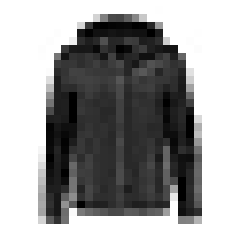

In [13]:
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

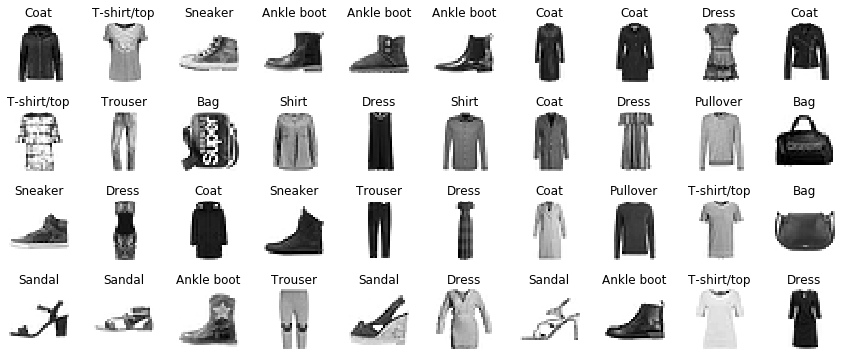

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [15]:
keras.backend.clear_session()

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.layers

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


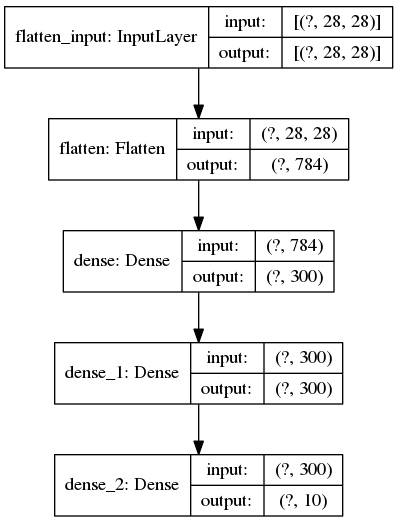

In [19]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png",
                      show_shapes=True)

In [20]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=sgd,
             metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 94us/sample - loss: 0.5307 - accuracy: 0.8074 - val_loss: 0.3900 - val_accuracy: 0.8604
Epoch 2/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.3846 - accuracy: 0.8583 - val_loss: 0.3674 - val_accuracy: 0.8684
Epoch 3/30
55000/55000 [==============================] - 5s 86us/sample - loss: 0.3462 - accuracy: 0.8708 - val_loss: 0.3792 - val_accuracy: 0.8630
Epoch 4/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.3167 - accuracy: 0.8817 - val_loss: 0.3641 - val_accuracy: 0.8698
Epoch 5/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2974 - accuracy: 0.8879 - val_loss: 0.3329 - val_accuracy: 0.8786
Epoch 6/30
55000/55000 [==============================] - 5s 86us/sample - loss: 0.2824 - accuracy: 0.8943 - val_loss: 0.3204 - val_accuracy: 0.8868
Epoch 7/30
55000/55000 [==============================] -

In [26]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [27]:
hidden1 = model.layers[1]
print(hidden1.name)

dense


In [28]:
weights, biases = hidden1.get_weights()
print(weights.shape, weights)
print(biases)

(784, 300) [[ 0.02419986 -0.00877795 -0.02188926 ... -0.02757603  0.03848868
  -0.06884345]
 [ 0.00449126 -0.03105386 -0.05869041 ...  0.00635566 -0.02757464
  -0.04117598]
 [-0.06269314 -0.06901957  0.07154666 ... -0.04441687  0.07178453
  -0.07351861]
 ...
 [-0.02143106  0.02103279 -0.05599769 ... -0.05063328 -0.00900578
   0.04082847]
 [ 0.07664813 -0.06973701  0.06885253 ...  0.00157622 -0.00225718
   0.02332245]
 [-0.0603653   0.01582884 -0.02609502 ... -0.0030156   0.0056435
  -0.0694922 ]]
[ 0.09529857 -0.02082378 -0.00775396  0.19938193  0.33640146 -0.03333608
  0.0409496   0.24719156  0.40724868  0.16689593 -0.01325386  0.02203899
  0.36582804 -0.02401013  0.14313407 -0.01080147  0.26104522  0.09695474
  0.05910917  0.0389272  -0.10952799 -0.0689824   0.08963633  0.02632368
  0.07223692 -0.17343566  0.09114021  0.2570016   0.14456613  0.03429125
 -0.18451689 -0.12851398  0.10575161 -0.00699872  0.31580827  0.4321343
  0.48036167 -0.18417744  0.04013071  0.14536561  0.00674478 

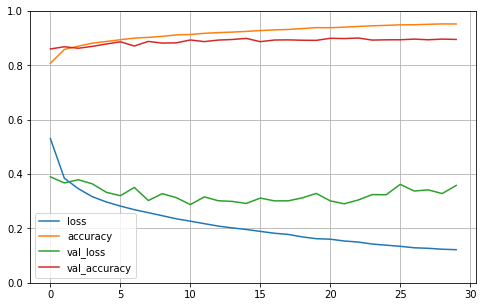

In [29]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.4047 - accuracy: 0.8879


[0.40468597675561907, 0.8879]

In [34]:
y_pred = model.predict_classes(X_test[:3])
print(y_pred)
print([class_names[index] for index in y_pred])

[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


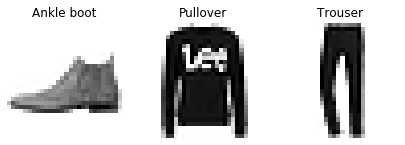

In [35]:
plt.figure(figsize=(7, 3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()